## Тестовое задание

#### Загружаем данные и импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (18, 5)


import statsmodels.api as sm
import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('BST_DataSet.xlsx', index_col = 0)
df.shape

(84, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2011-01-01 to 2017-12-01
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Прирост вкладов физических лиц в рублях (млн руб)  72 non-null     float64
 1   Доходность ОФЗ по сроку до 1 года                  84 non-null     float64
 2   Ключевая ставка                                    84 non-null     float64
 3   Ставка по вкладам в долларах до 1 года             84 non-null     float64
 4   Ставка по вкладам в рублях до 1 года               84 non-null     float64
 5   Нефть марки Юралс, долл./барр                      84 non-null     float64
 6   Индекс потребительских цен, ед.                    84 non-null     float64
 7   М0, млрд руб                                       84 non-null     float64
 8   М2, млрд руб                                       84 non-null     float

In [4]:
df.head()

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
2011-01-01,-79049.0,5.244667,7.75,2.9,4.5,96.29,106.17151,5062.7,20011.9,30.08,20669
2011-02-01,180475.0,5.144211,8.00,3.1,4.4,103.96,106.99964,4830.7,19307.7,29.29,20680
2011-03-01,106845.0,5.021364,8.00,3.1,4.2,114.44,107.66304,4898.0,19536.7,28.43,22673
2011-04-01,224890.0,4.558571,8.00,2.6,4.1,123.15,108.12599,4918.2,19788.7,28.10,22519
2011-05-01,45856.0,4.795000,8.25,2.6,4.1,114.46,108.64500,5071.3,20020.8,27.87,22779


In [5]:
df.describe().round()

,Прирост вкладов физических лиц в рублях (млн руб),Доходность ОФЗ по сроку до 1 года,Ключевая ставка,Ставка по вкладам в долларах до 1 года,Ставка по вкладам в рублях до 1 года,"Нефть марки Юралс, долл./барр","Индекс потребительских цен, ед.","М0, млрд руб","М2, млрд руб","Курс доллара к рублю, руб","Номинальная средняя з/п, руб"
count,72.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0,84.0
mean,146640.0,8.0,9.0,2.0,6.0,83.0,137.0,6589.0,29839.0,45.0,31877.0
std,259386.0,2.0,2.0,1.0,2.0,30.0,22.0,845.0,5985.0,16.0,6029.0
min,-567448.0,5.0,6.0,1.0,4.0,31.0,106.0,4831.0,19308.0,28.0,20669.0
25%,19490.0,6.0,8.0,2.0,5.0,52.0,116.0,5976.0,24443.0,31.0,26831.0
50%,112924.0,7.0,8.0,2.0,6.0,100.0,131.0,6668.0,30107.0,36.0,32356.0
75%,236053.0,9.0,10.0,3.0,7.0,110.0,160.0,7188.0,34793.0,60.0,35772.0
max,1034556.0,15.0,17.0,5.0,12.0,125.0,170.0,8090.0,40114.0,77.0,50500.0


#### Построим визуализацию для целевой переменной

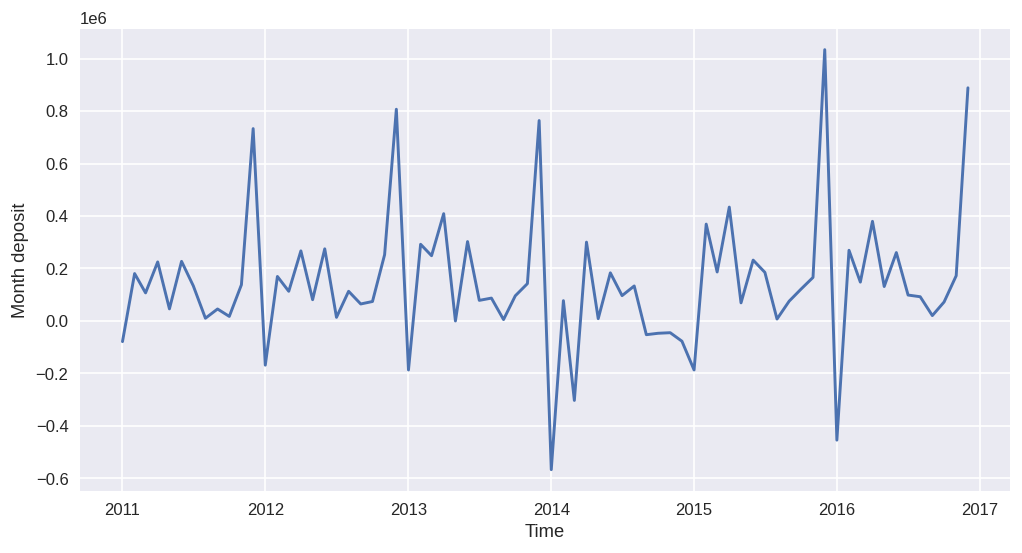

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(df.iloc[:,0])
plt.xlabel('Time'); plt.ylabel('Month deposit');

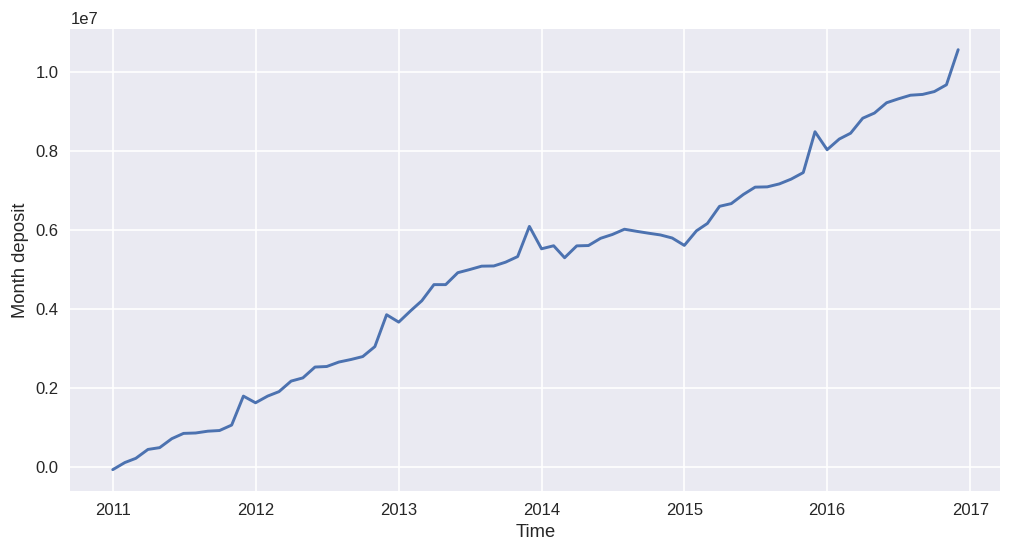

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df.iloc[:,0].cumsum())
plt.xlabel('Time'); plt.ylabel('Month deposit');

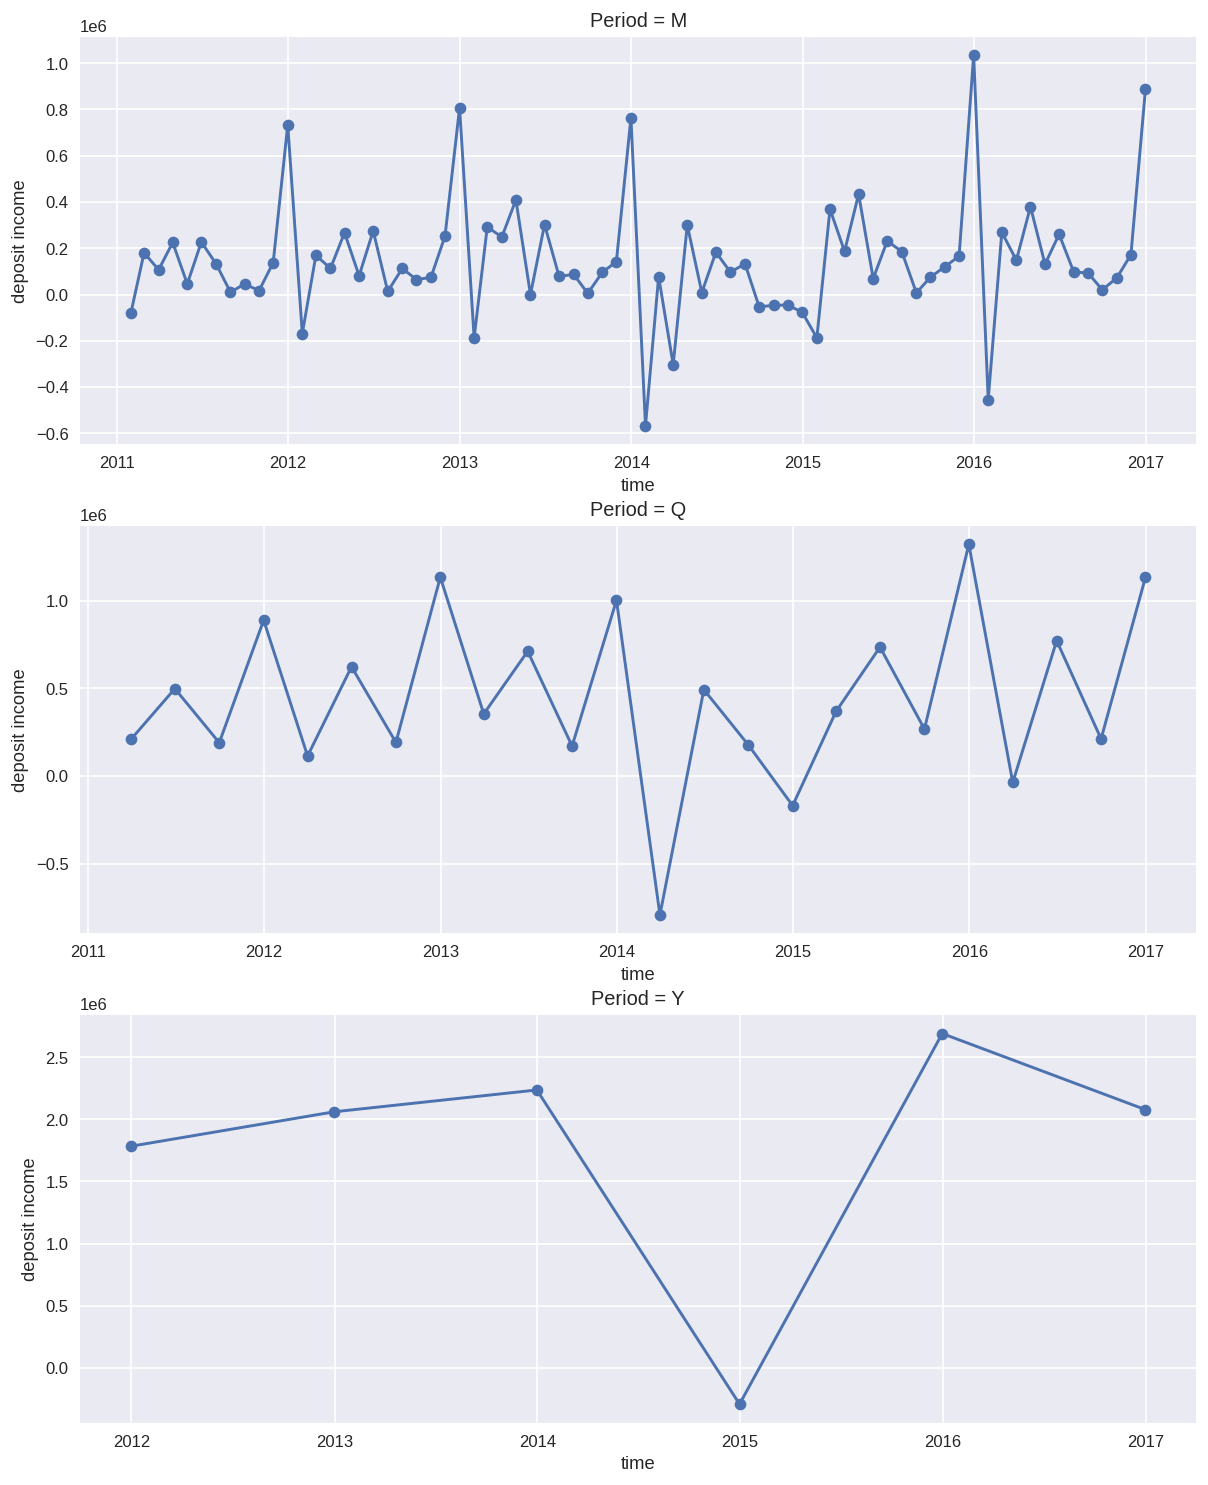

In [8]:
_, ax = plt.subplots(figsize = (12, 15), nrows=3)

period = ['M', 'Q', 'Y']
for i in range(3):
    ax[i].plot(df.iloc[:72, 0].resample(period[i]).sum(), '-o')
    ax[i].set(
        xlabel = 'time',
        ylabel = 'deposit income',
        title = f'Period = {period[i]}')

#### Построим визуализацию скользящего среднего и экспонициальных скользящих средних

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

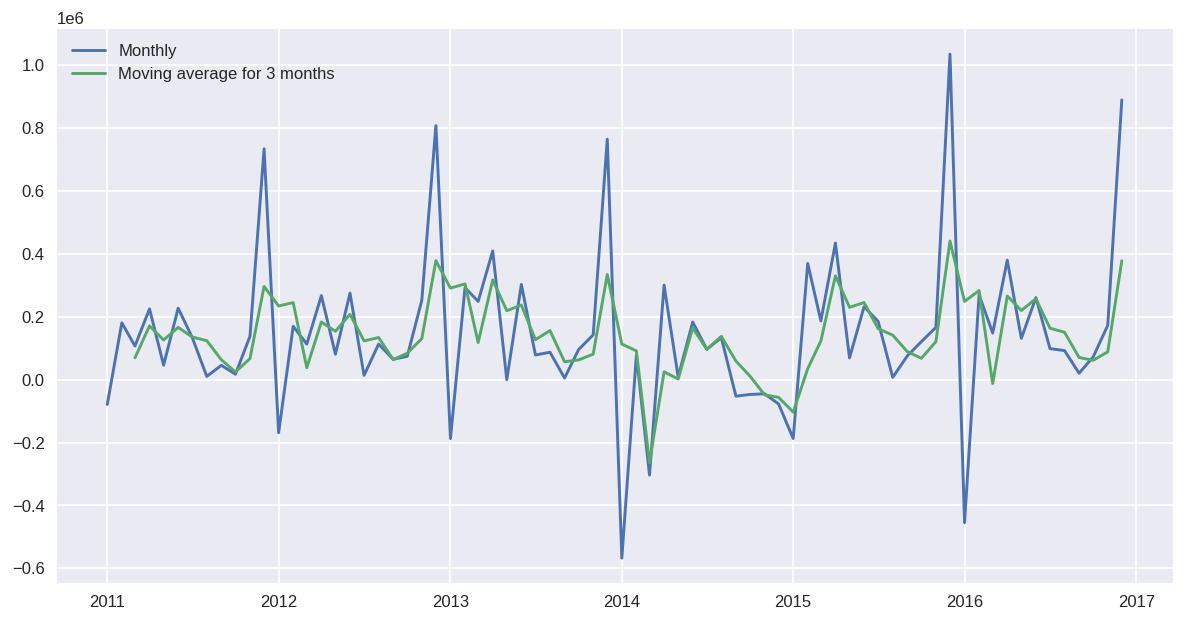

In [10]:
n_months = 3
plt.figure(figsize=(12, 6))
plt.plot(df.iloc[:,0], label='Monthly')
plt.plot(df.iloc[:,0].rolling(window=n_months).mean(), label=f'Moving average for {n_months} months')
plt.legend();

In [11]:
#двигаем один раз налево, так как  SimpleExpSmoothing автоматически сдвигает на единицу

exp_model = SimpleExpSmoothing(df.iloc[:72,0],
            initialization_method='known', initial_level=df.iloc[0,0])

alpha = 0.7
fitted_exp_model = exp_model.fit(smoothing_level=alpha,optimized=False)
data_exp_model = fitted_exp_model.predict(df.iloc[:,0].index.values[0], 
                                          '2018-01-01'
                                         ).shift(-1)

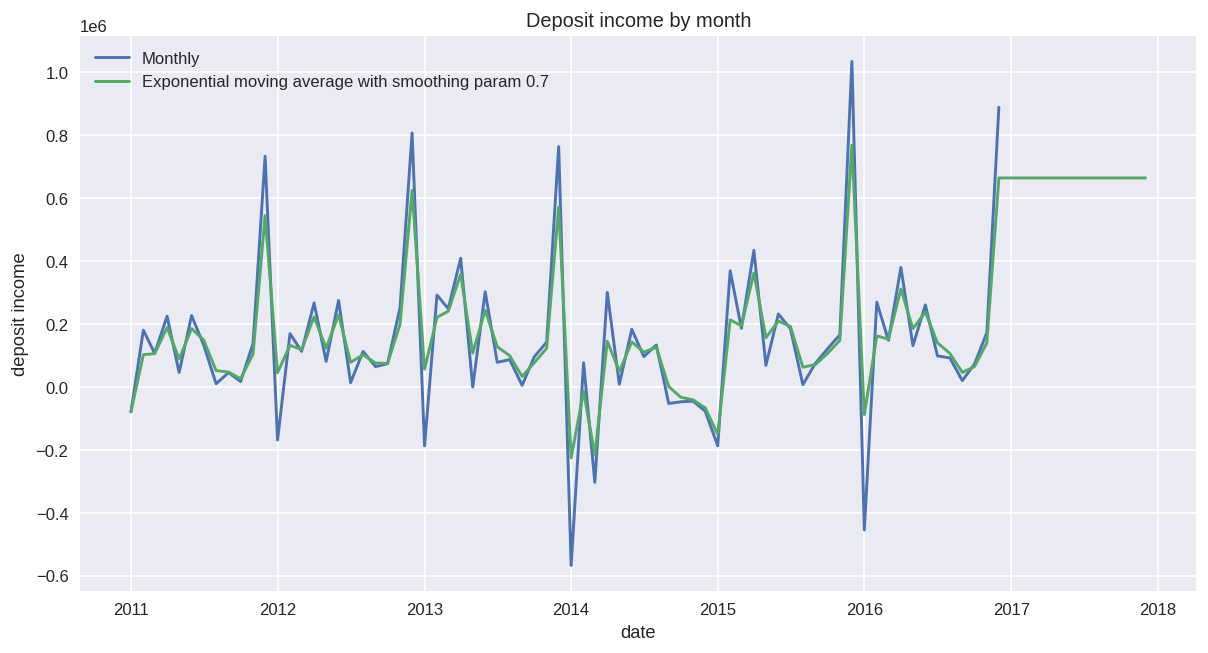

In [12]:
_, ax = plt.subplots(figsize = (12, 6))

ax.plot(df.iloc[:,0], label='Monthly')
ax.plot(data_exp_model, label=f'Exponential moving average with smoothing param {alpha}')

ax.set(
    xlabel = 'date',
    ylabel = 'deposit income',
    title = 'Deposit income by month')
ax.legend();

In [13]:
holt_model = Holt(df.iloc[:72,0],
                  initialization_method='known', 
                  initial_level= df.iloc[0,0], 
                  initial_trend= df.iloc[1,0] - df.iloc[0,0]            
                 )

alpha = 0.7
beta = 0.3
fitted_holt_model = holt_model.fit(alpha, beta, optimized = False)
data_holt_model = fitted_holt_model.predict(df.iloc[:,0].index.values[0], 
                                            '2018-01-01'
                                           ).shift(-1)

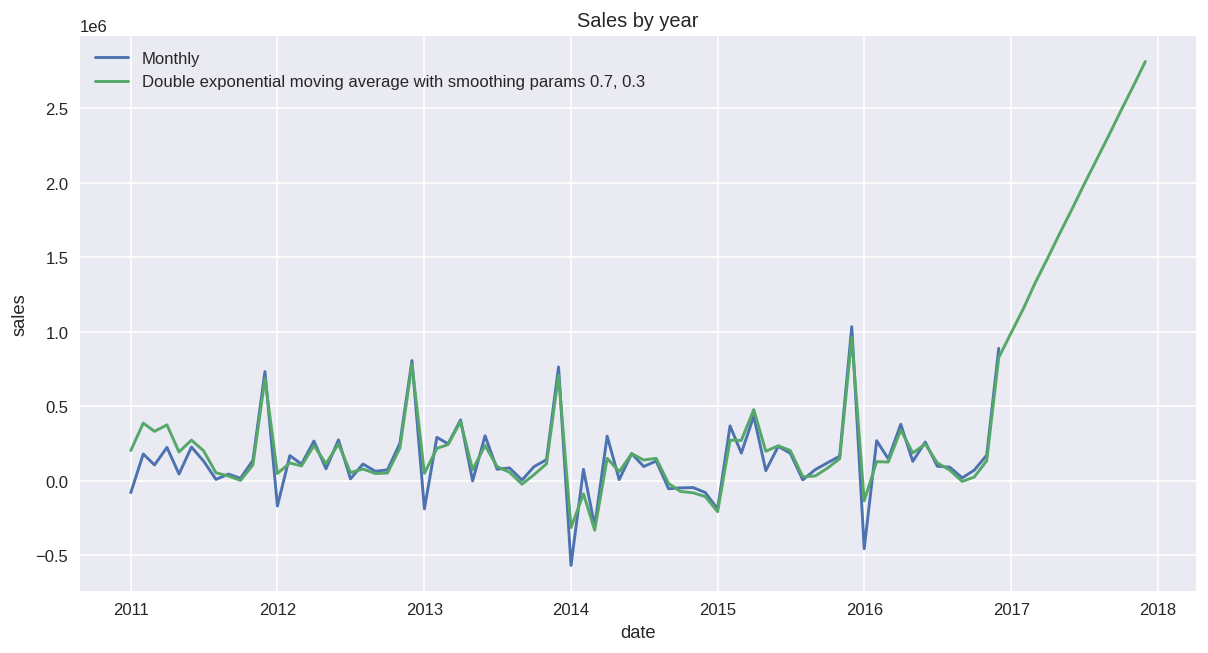

In [14]:
_, ax = plt.subplots(figsize = (12, 6))

ax.plot(df.iloc[:,0], label='Monthly')
ax.plot(data_holt_model, label=f'Double exponential moving average with smoothing params {alpha}, {beta}')


ax.set(
    xlabel = 'date',
    ylabel = 'sales',
    title = 'Sales by year')
ax.legend();

In [15]:
holt_wint_model = ExponentialSmoothing(
                    df.iloc[:60, 0],
                    trend='add',
                    seasonal='add')

fitted_holt_wint_model = holt_wint_model.fit()

alpha, beta, gamma = list(fitted_holt_wint_model.params.values())[:3]
data_holt_wint_model = fitted_holt_wint_model.predict(df.index.values[60],
                                                      '2017-12-01'
                                                     )

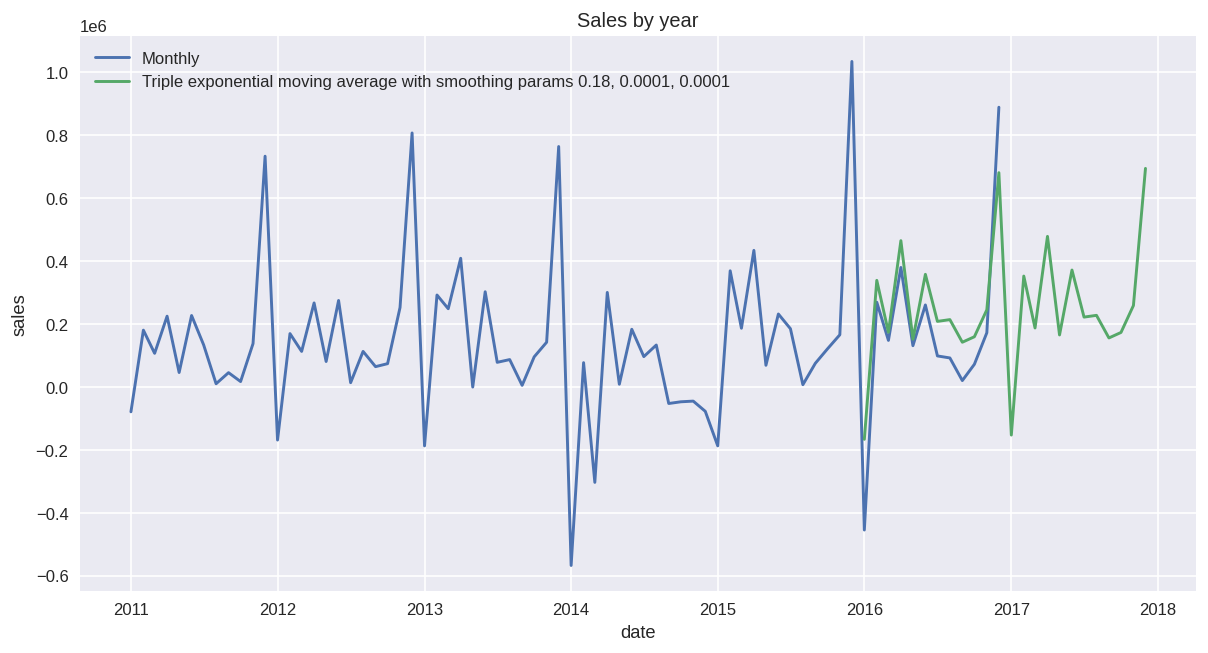

In [16]:
_, ax = plt.subplots(figsize = (12, 6))

ax.plot(df.iloc[:,0], label='Monthly')
ax.plot(data_holt_wint_model, label=f'Triple exponential moving average with smoothing params {round(alpha, 2)}, {round(beta, 5)}, {round(gamma, 5)}')


ax.set(
    xlabel = 'date',
    ylabel = 'sales',
    title = 'Sales by year')
ax.legend();

#### Проверим на 2017 годе работу модели 3-ного экспонециального сглаживания

In [17]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [18]:
pred_holt_wint_model = fitted_holt_wint_model.predict(start='2016-01-01', end='2016-12-01').round(2)

print("Результаты работы тройного экспонециального сглаживания:")
print(f"MAE: {mean_absolute_error(pred_holt_wint_model, df.iloc[60:72,0]).round()}")
print(f"RMSE:{np.sqrt(mean_squared_error(pred_holt_wint_model, df.iloc[60:72, 0])).round()}")
print(f"MAPE:{mean_absolute_percentage_error(pred_holt_wint_model, df.iloc[60:72,0]).round(4)}")

Результаты работы тройного экспонециального сглаживания:
MAE: 109041.0
RMSE:130292.0
MAPE:0.4816


In [19]:
#Предсказание holt-winters модели
holt_wint_model = ExponentialSmoothing(
                    df.iloc[:72, 0],
                    trend='add',
                    seasonal='add')

fitted_holt_wint_model = holt_wint_model.fit()

alpha, beta, gamma = list(fitted_holt_wint_model.params.values())[:3]
prediction_holt_wint = fitted_holt_wint_model.predict('2017-01-01',
                                                      '2017-12-01'
                                                     )

#### Разложим на компоненты наш временной ряд

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

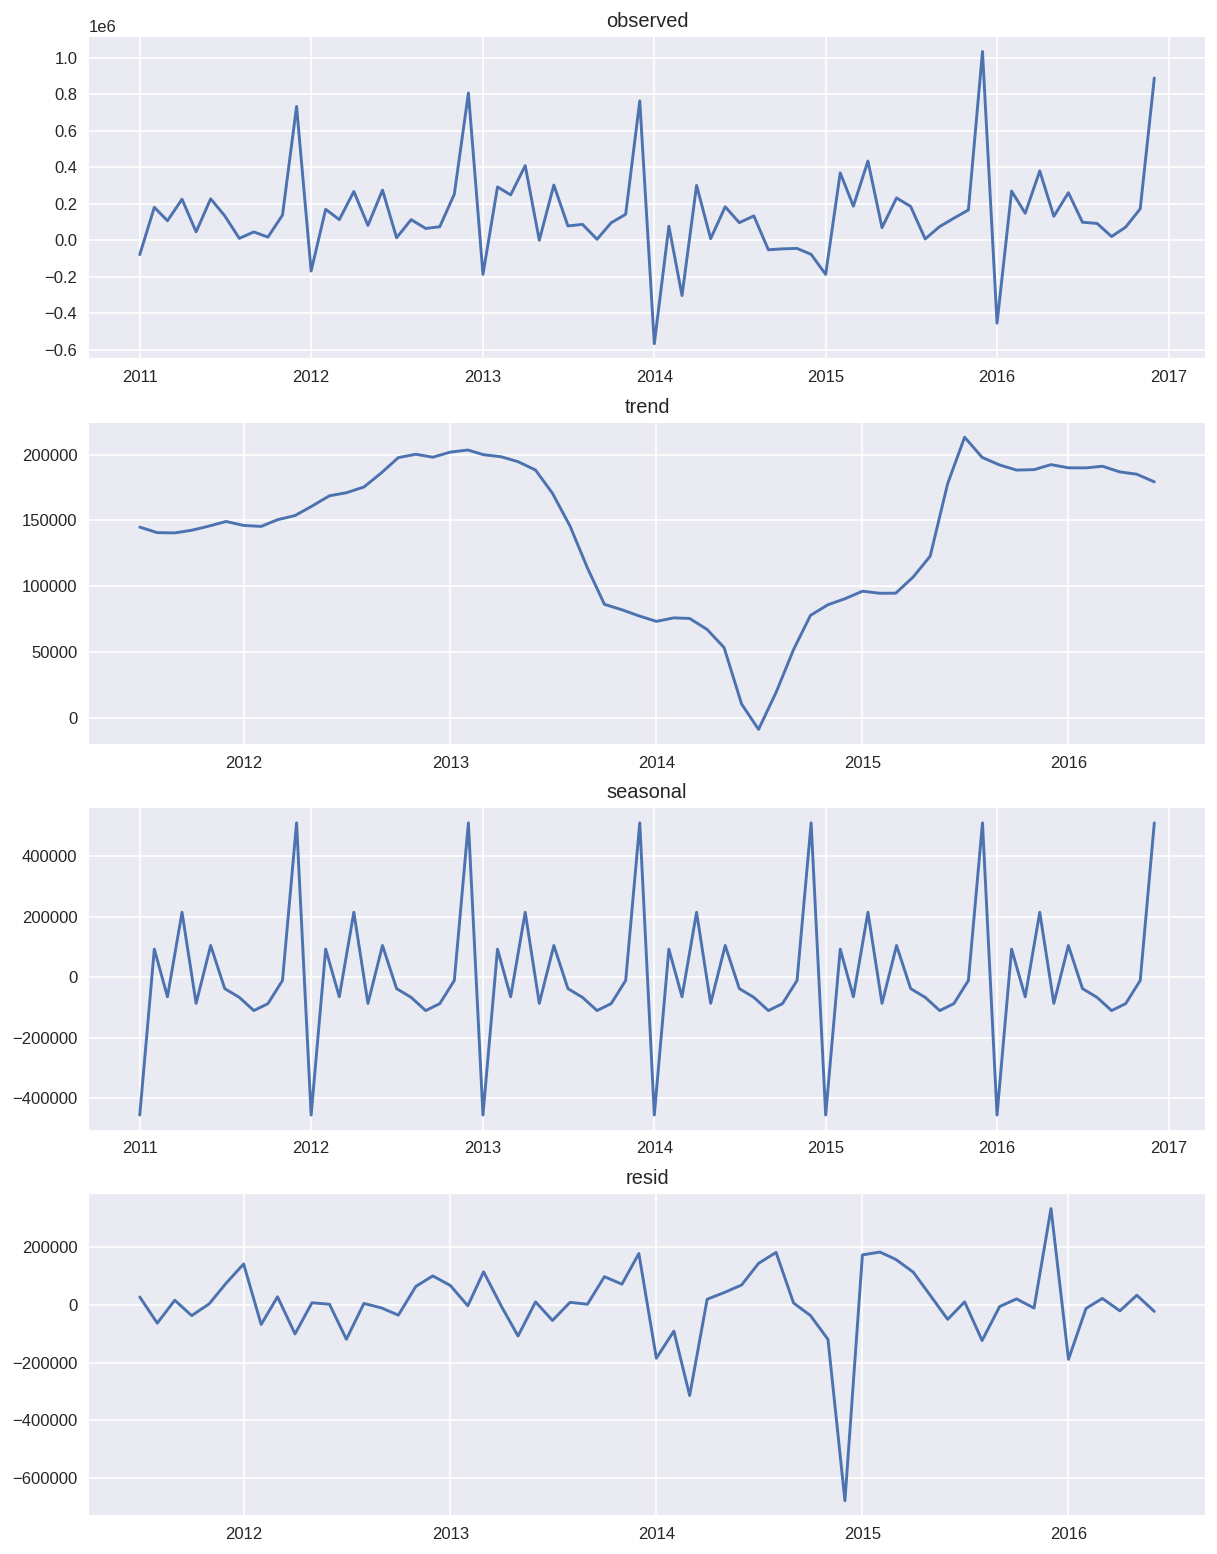

In [21]:
_, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(12,16))

decomposed = seasonal_decompose(df.iloc[:72, 0])

ax1.plot(decomposed.observed); ax1.set_title('observed')
ax2.plot(decomposed.trend); ax2.set_title('trend')
ax3.plot(decomposed.seasonal); ax3.set_title('seasonal')
ax4.plot(decomposed.resid); ax4.set_title('resid');

Заметим, в данных есть годовая сезонность, и убывающий, и возрастающий (преобладающего нет) тренд и ошибки составляют больше 20%.

#### Построим модели семейства ARMA

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

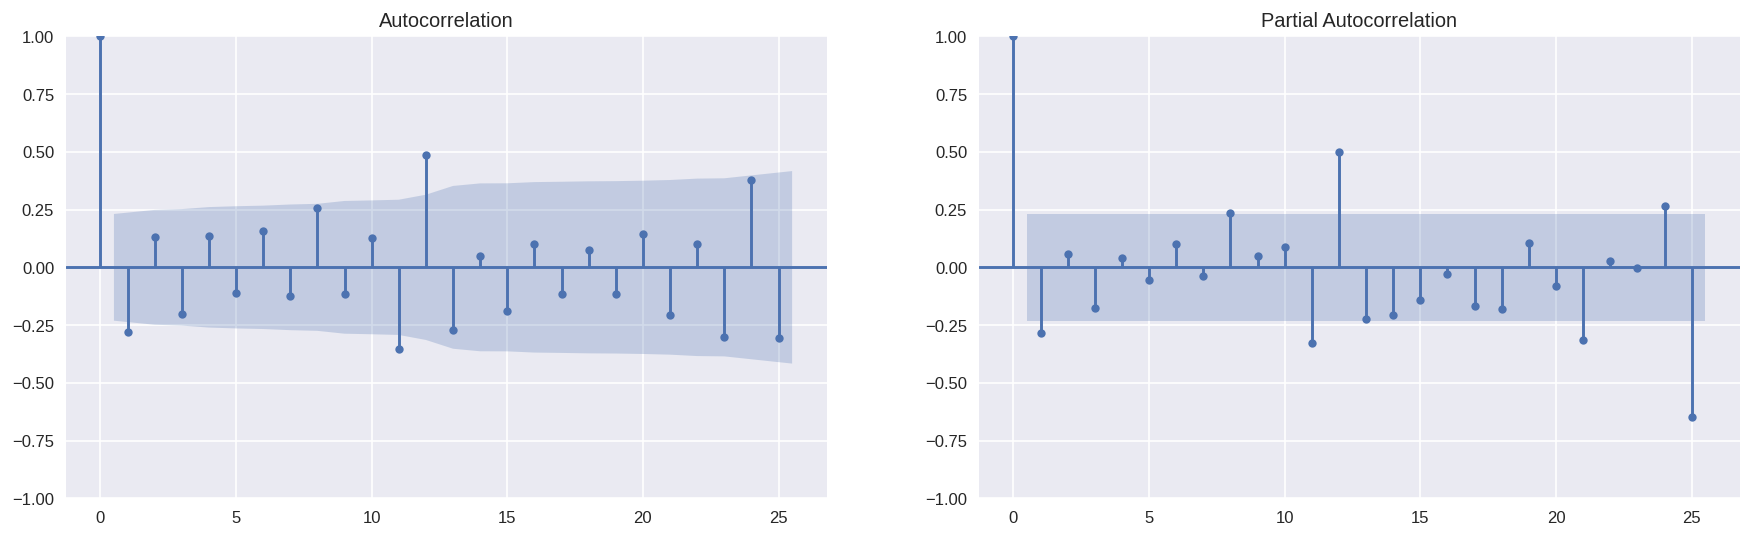

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
n_lags = 25
acf = plot_acf(df.iloc[:72, 0], ax=ax1, lags=n_lags)
pacf = plot_pacf(df.iloc[:72, 0], ax=ax2, lags=n_lags)

Есть заметная положительная корреляция на лаге 12 месяцев, то есть положительный годовой тренд.

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
#Строим дифференцацию
df_arima = df.iloc[:72, 0].to_frame('deposit_income')

df_arima['deposit_income_month_shift'] = df_arima['deposit_income'] - df_arima['deposit_income'].shift(1)
df_arima['deposit_income_quarter_shift'] = df_arima['deposit_income'] - df_arima['deposit_income'].shift(3)
df_arima['deposit_income_halfyear_shift'] = df_arima['deposit_income'] - df_arima['deposit_income'].shift(6)
df_arima['deposit_income_year_shift'] = df_arima['deposit_income'] - df_arima['deposit_income'].shift(12)

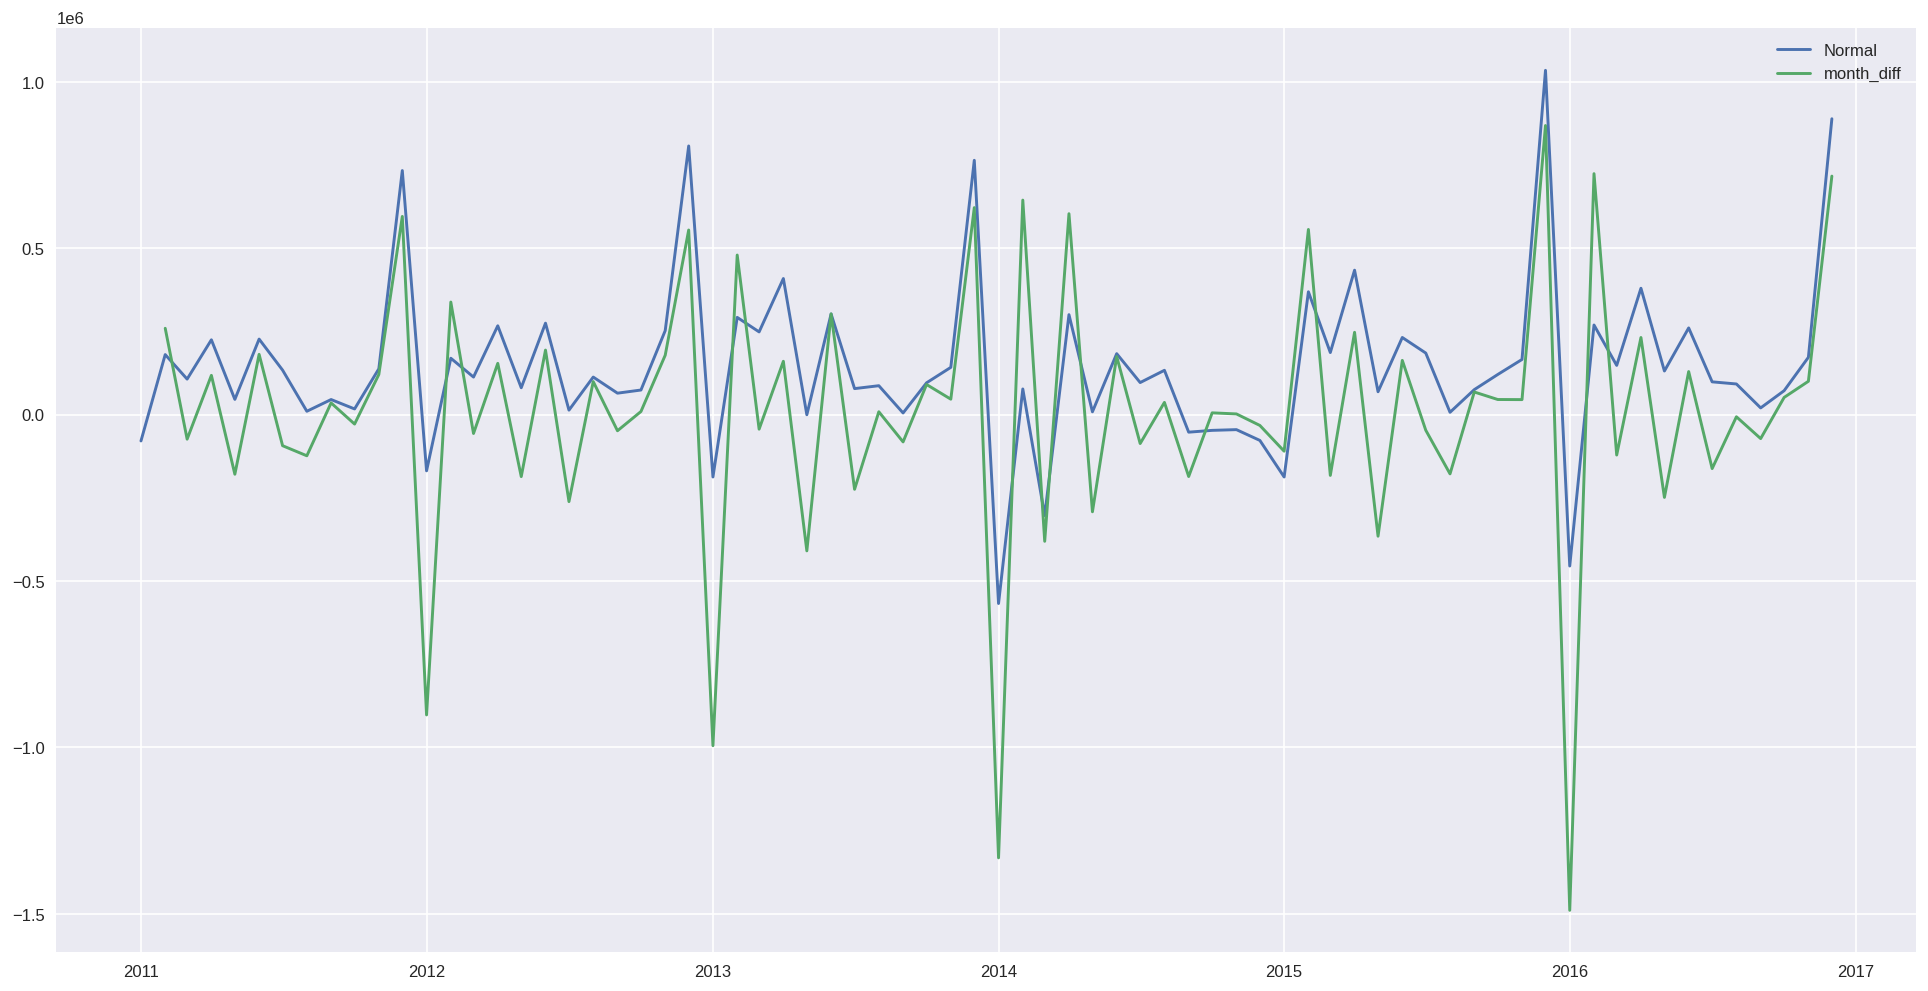

In [26]:
#Смотрим дифференцацию

plt.figure(figsize=(20, 10))

plt.plot(df_arima['deposit_income'], label = 'Normal')
plt.plot(df_arima['deposit_income_month_shift'], label = 'month_diff')
# plt.plot(df_arima['deposit_income_quarter_shift'], label = 'quarter_diff')
# plt.plot(df_arima['deposit_income_halfyear_shift'], label='halfyear_diff')
# plt.plot(df_arima['deposit_income_year_shift'], label='year_diff')
plt.legend();

In [27]:
# не можем считать, что стационарный 
adfuller(df_arima['deposit_income'])

(-1.562451382739833,
 0.5024228765613988,
 12,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 1634.4005057329534)

In [28]:
#считаем, что стационарный
adfuller(df_arima['deposit_income_month_shift'][1:])

(-3.138898009311676,
 0.02380530677859992,
 11,
 59,
 {'1%': -3.5463945337644063,
  '5%': -2.911939409384601,
  '10%': -2.5936515282964665},
 1609.1879873067824)

In [29]:
from statsmodels.tsa.arima.model import ARIMA

In [30]:
#Строим arima модель

# Смотрим график PACF
p = 12

#shift(-1)
d = 1

# Смотрим график ACF
q = 11

arima_model = ARIMA(
    df_arima['deposit_income'][:'2016-12-01'],
    order=(p,d,q)
)
res = arima_model.fit()

#предсказания
pred = res.predict('2011-01-01', '2017-12-01')

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:         deposit_income   No. Observations:                   72
Model:               ARIMA(12, 1, 11)   Log Likelihood                -967.184
Date:                Wed, 23 Nov 2022   AIC                           1982.367
Time:                        16:00:21   BIC                           2036.672
Sample:                    01-01-2011   HQIC                          2003.963
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2566      0.847     -0.303      0.762      -1.916       1.403
ar.L2         -0.2473      0.794     -0.312      0.755      -1.803       1.309
ar.L3         -0.6306      0.755     -0.835      0.4

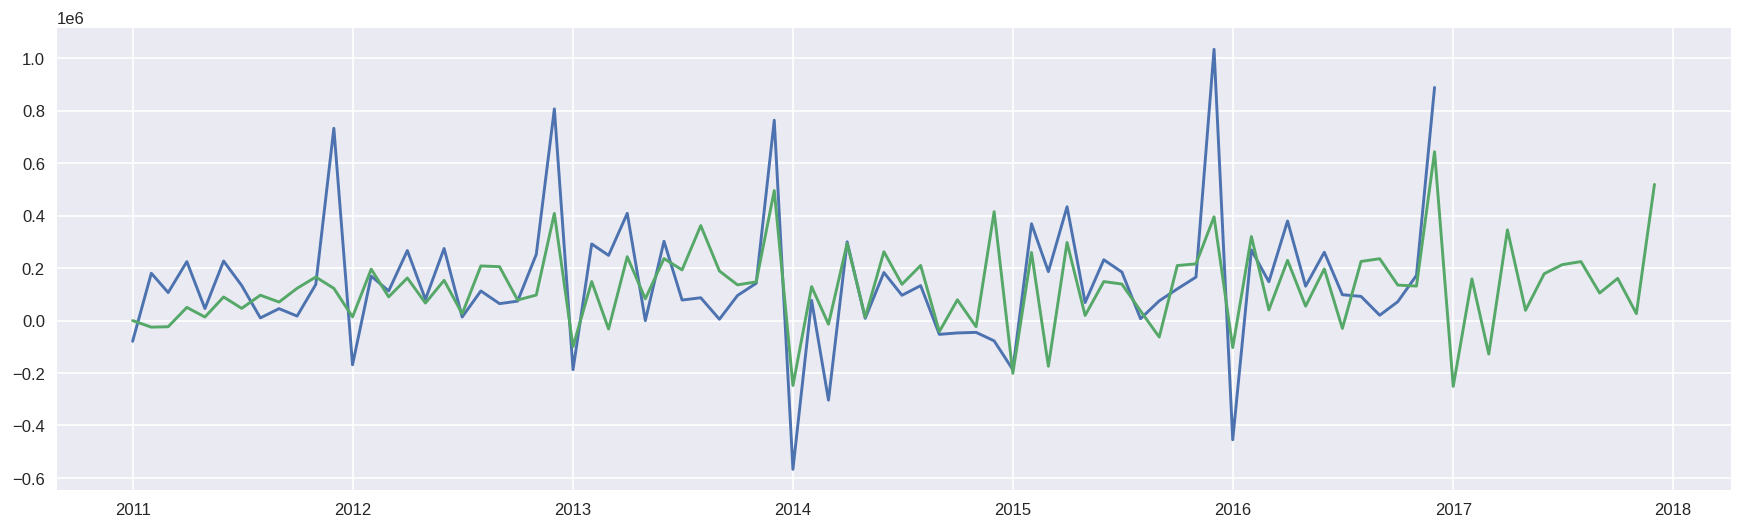

In [31]:
plt.plot(df_arima['deposit_income'])
plt.plot(pred);

In [32]:
from tqdm import tqdm
from itertools import product

In [33]:
ps = range(0, 3)
ds=range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
Ds=range(0, 3)
Qs = range(0, 3)


parameters = product(ps, qs, Ps, Qs, ds, Ds)
parameters_list = list(parameters)

results = []
best_metric_mae_score = float("inf")

for param in tqdm(parameters_list):
    model=ARIMA(df_arima['deposit_income'][:'2016-12-01'], 
                order=(param[0], param[4], param[1]), 
                seasonal_order=(param[2], param[5], param[3], 12)).fit()
    
    pred_2 = model.predict('2016-01-01', '2016-12-01').round(2)
    metric_mae_score = mean_absolute_error(pred_2, df.iloc[60:72,0]).round()
    
    if metric_mae_score < best_metric_mae_score:
        best_model = model
        best_metric_mae_score = metric_mae_score
        best_param = param
        results.append([param, model.aic, best_metric_mae_score])

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic', 'mae_score']
print(result_table.sort_values(by = 'aic', ascending=True).head())

100%|█████████████████████████████████████████| 486/486 [03:13<00:00,  2.51it/s]

           parameters          aic  mae_score
3  (0, 0, 2, 1, 0, 2)  1340.592722    59008.0
2  (0, 0, 0, 2, 0, 2)  1363.308610    62558.0
4  (0, 0, 2, 2, 0, 1)  1641.222527    48296.0
1  (0, 0, 0, 0, 0, 1)  1659.156270    81532.0
0  (0, 0, 0, 0, 0, 0)  2239.354381   179968.0


In [34]:
#Строим sarima модель

# Смотрим график PACF
p = 0
P = 0

d = 0
D = 2

# Смотрим график ACF
q = 0
Q = 2

#Сезонный лаг 
s = 12

sarima_model = ARIMA(
    df_arima['deposit_income'][:'2015-12-01'],
    order=(p,d,q),
    seasonal_order=(P, D, Q, s)
)
res_2 = sarima_model.fit()

#Предсказания
pred_2 = res_2.predict('2016-01-01', '2016-12-01').round(2)
print(res_2.summary())

                                  SARIMAX Results                                  
Dep. Variable:              deposit_income   No. Observations:                   60
Model:             ARIMA(0, 2, [1, 2], 12)   Log Likelihood                -510.572
Date:                     Wed, 23 Nov 2022   AIC                           1027.144
Time:                             16:03:35   BIC                           1031.895
Sample:                         01-01-2011   HQIC                          1028.802
                              - 12-01-2015                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -1.2188      0.233     -5.220      0.000      -1.676      -0.761
ma.S.L24       0.5057      0.460      1.100      0.271      -0.395       1.407
sigma2      

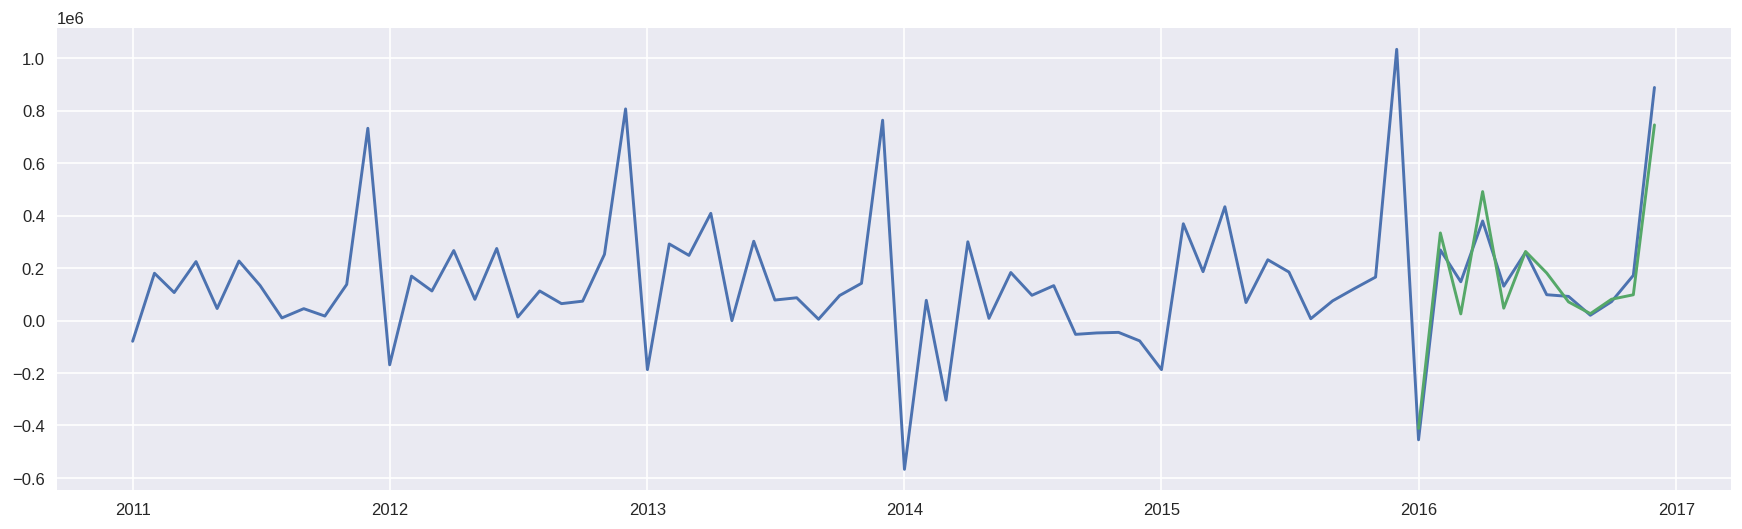

In [35]:
plt.plot(df_arima['deposit_income'])
plt.plot(pred_2)

In [36]:
print("Результаты работы модели SARIMA")
print(f"MAE: {mean_absolute_error(pred_2, df.iloc[60:72,0]).round()}")
print(f"RMSE:{np.sqrt(mean_squared_error(pred_2, df.iloc[60:72, 0])).round()}")
print(f"MAPE:{mean_absolute_percentage_error(pred_2, df.iloc[60:72,0]).round(4)}")

Результаты работы модели SARIMA
MAE: 63812.0
RMSE:78539.0
MAPE:0.7646


In [37]:
#Предсказание модели SARIMA

#подобранные параметры
p, P, q, Q, d, D = 0, 0, 0, 2, 0, 2

#Сезонный лаг 
s = 12

sarima_model = ARIMA(
    df_arima['deposit_income'][:'2016-12-01'],
    order=(p,d,q),
    seasonal_order=(P, D, Q, s)
).fit()

#Предсказания
pred_sarima = sarima_model.predict('2017-01-01', '2017-12-01').round(2)

#### Построим модель машинного обучения

In [38]:
#Создадим дополнительные фичи

df['month'] = df.index.month
df['day_in_month'] = df.index.daysinmonth

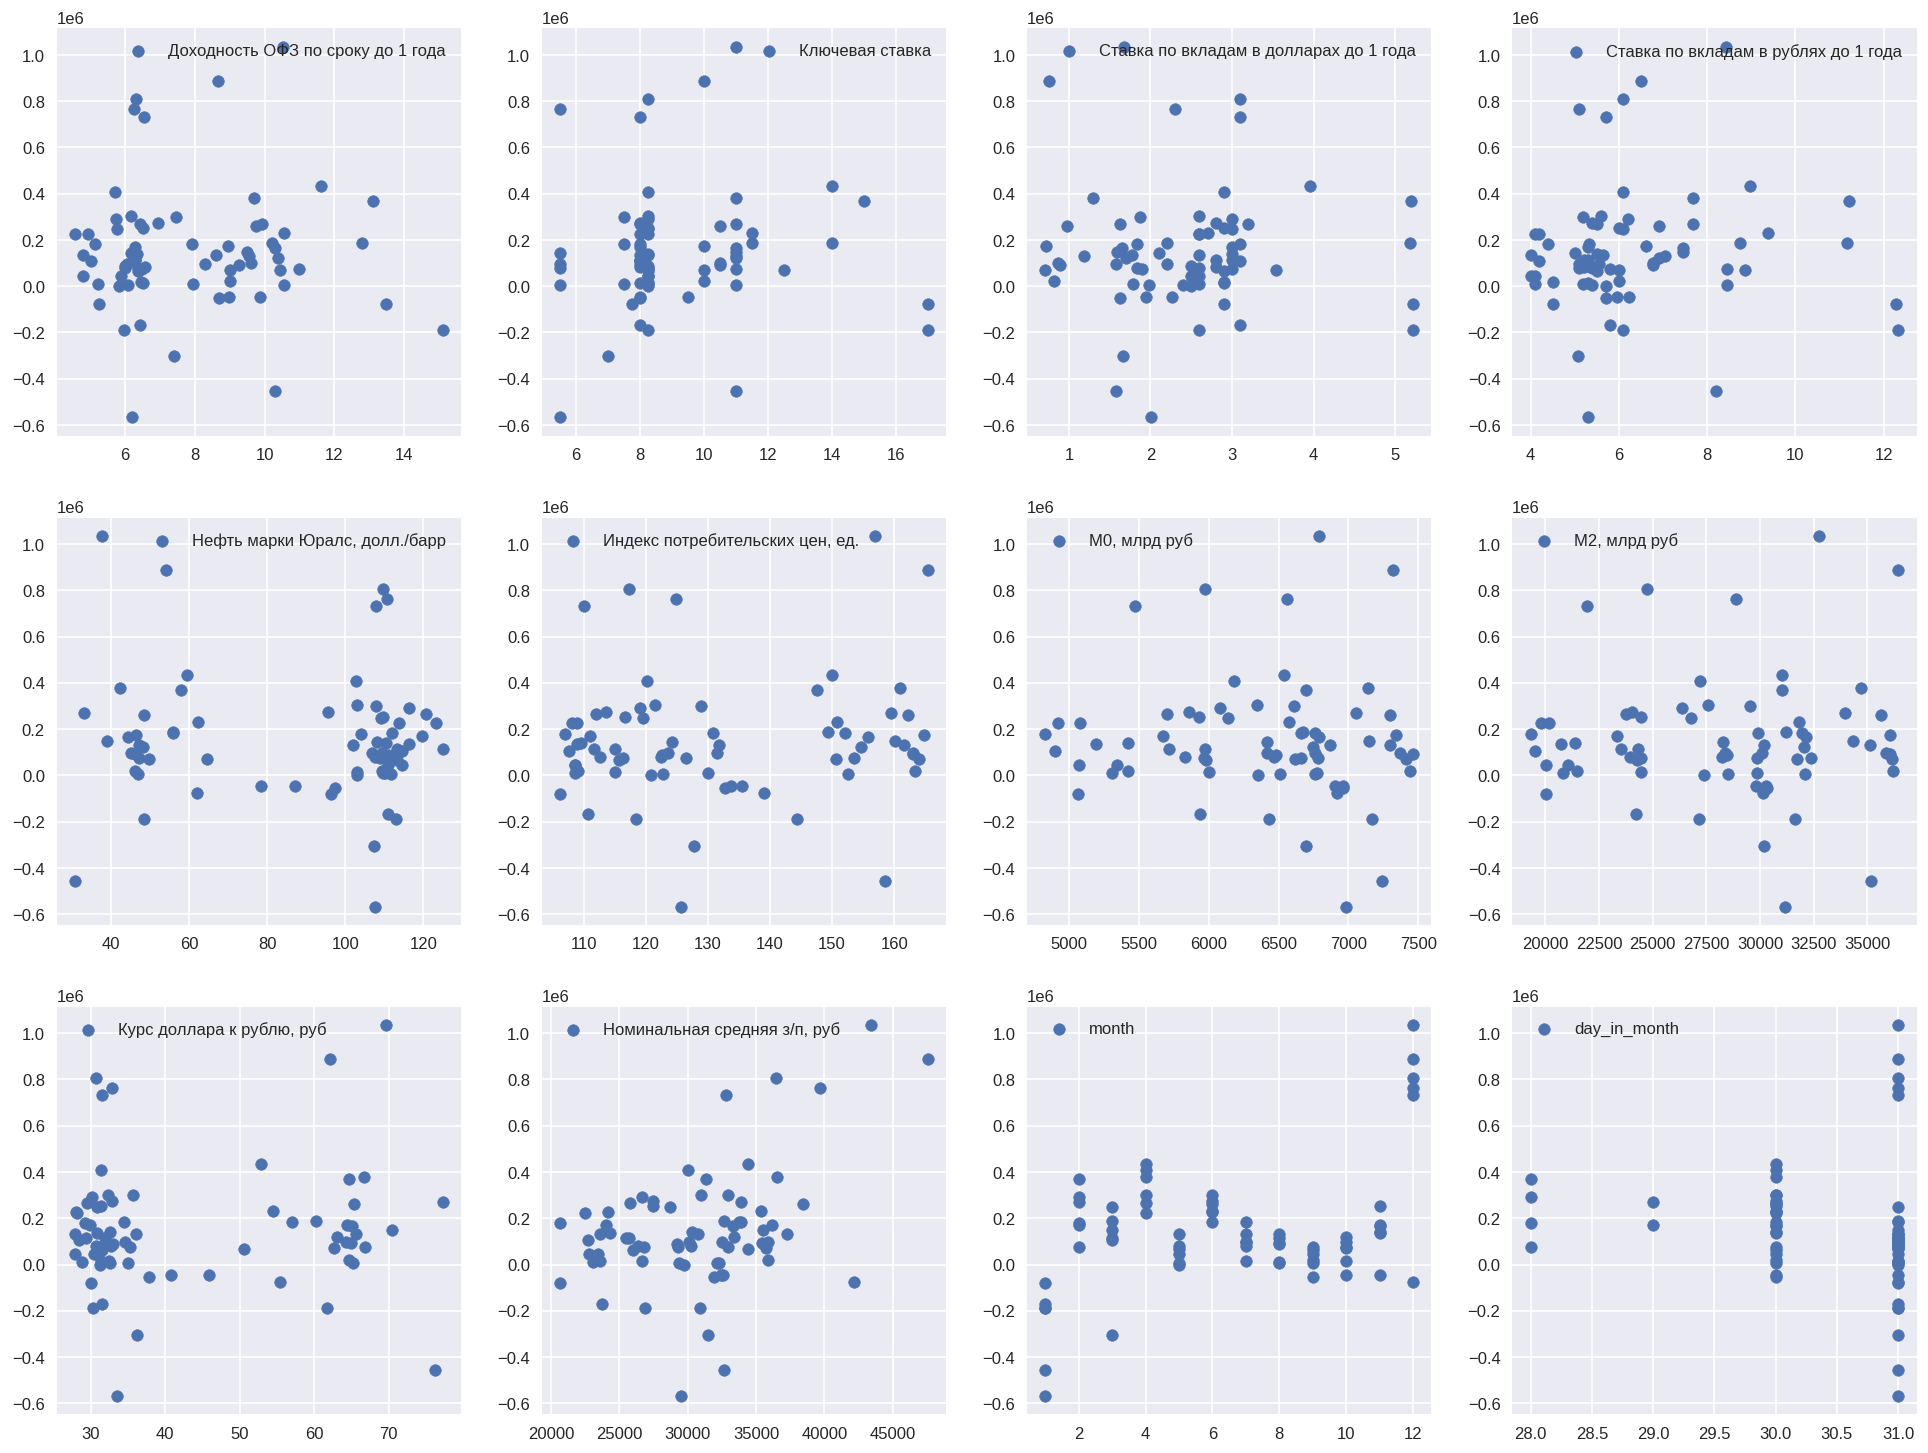

In [39]:
#Рисуем графики зависимости прироста фиизческих вкладов
_, ax = plt.subplots(3, 4, figsize = (20, 15))
for i in range(3):
    for j in range(4):
        n_col = i*4 + j + 1
        ax[i][j].scatter(df.iloc[:72, n_col], df.iloc[:72, 0], label = df.columns[n_col])
        ax[i][j].legend()

In [40]:
df = pd.get_dummies(df, columns = ['month'], prefix = 'month')

In [41]:
# делим данные на train, valid, test

X_train, X_valid, X_test = df.iloc[:60, 1:], df.iloc[60:72, 1:], df.iloc[72:, 1:]
y_train, y_valid = df.iloc[:60, 0], df.iloc[60:72, 0]

In [42]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

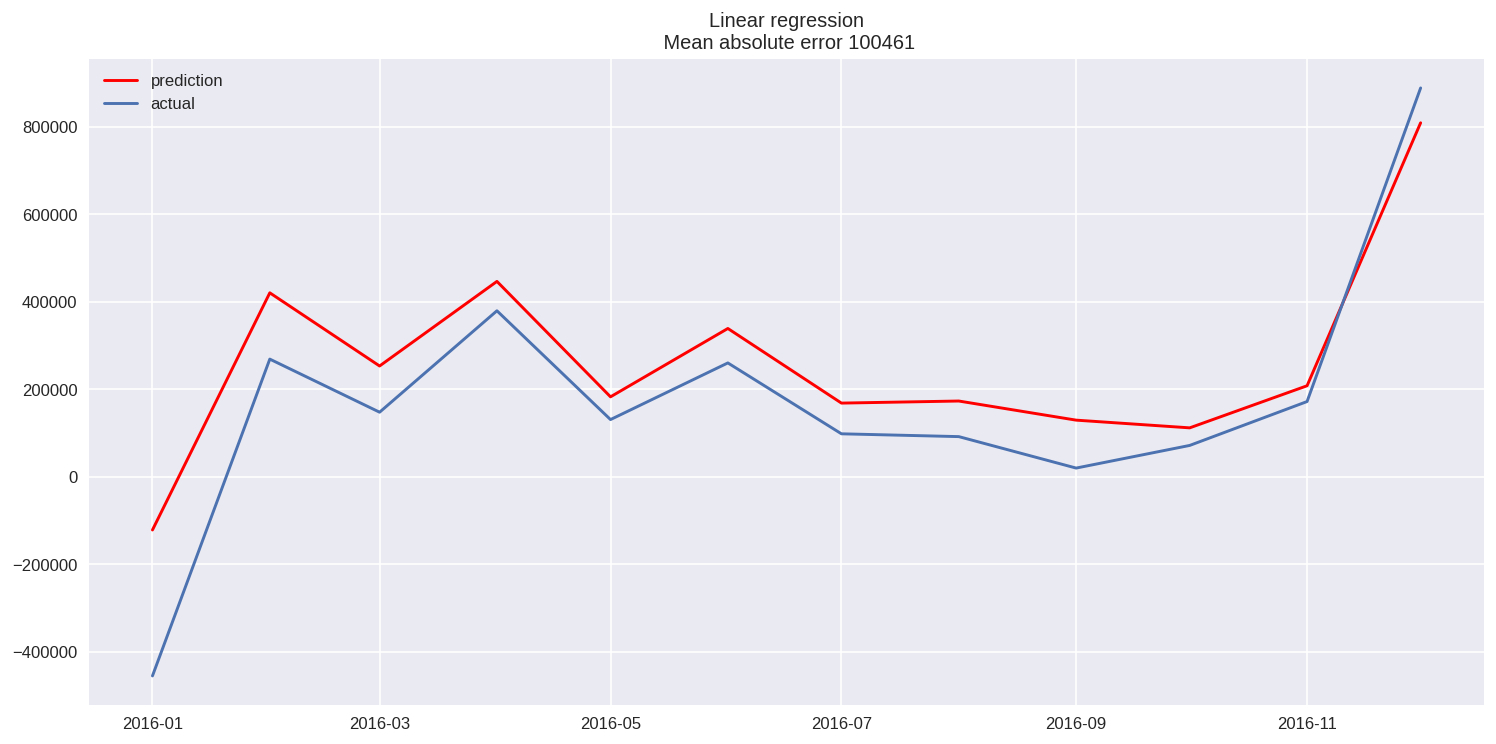

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)

prediction = pd.Series(lr.predict(X_valid), index = X_valid.index)

plt.figure(figsize=(15, 7))
plt.plot(prediction, "r", label="prediction")
plt.plot(y_valid, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {}".format(round(mean_absolute_error(prediction, y_valid))));

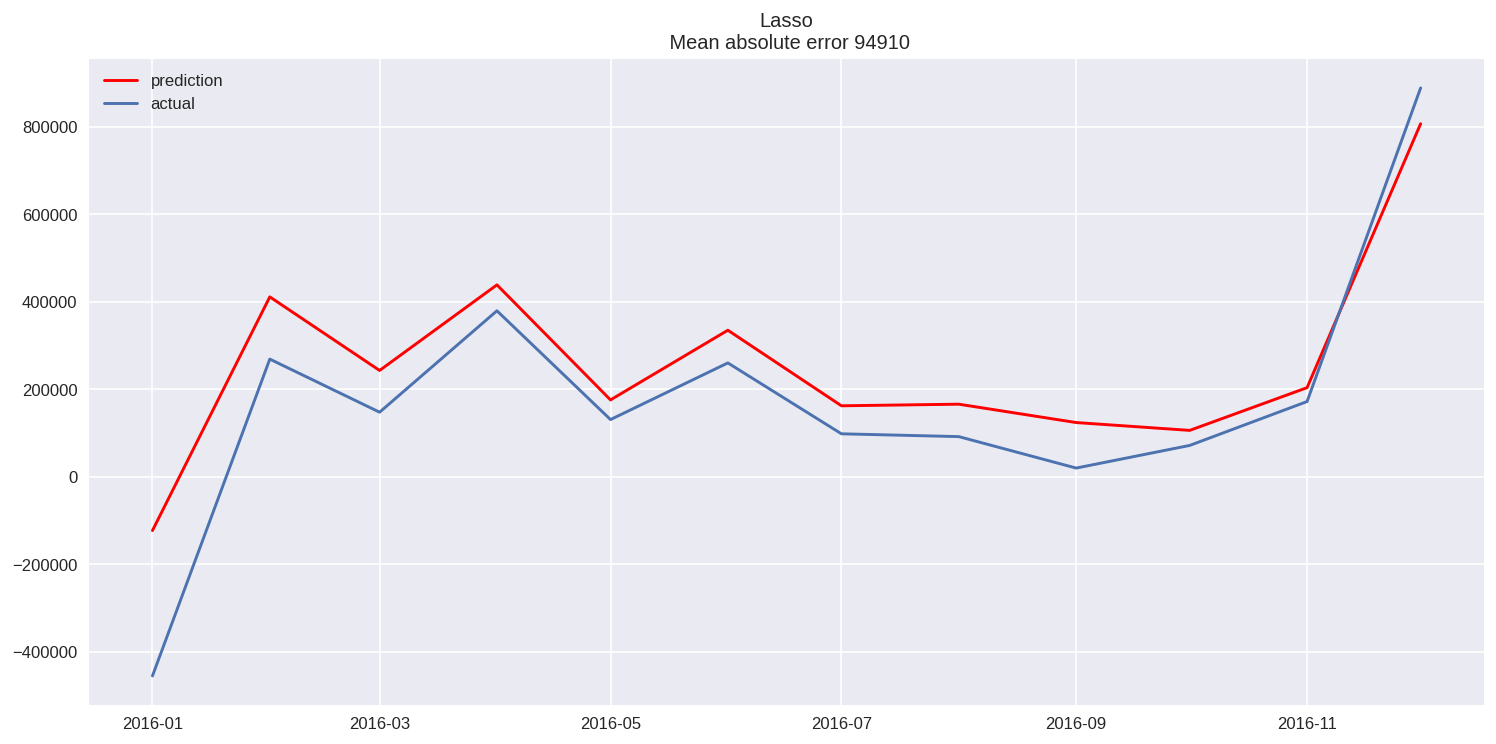

In [44]:
#модель Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

prediction_lasso = pd.Series(lasso.predict(X_valid), index = X_valid.index)

plt.figure(figsize=(15, 7))
plt.plot(prediction_lasso, "r", label="prediction")
plt.plot(y_valid, label="actual")
plt.legend(loc="best")
plt.title("Lasso\n Mean absolute error {}".format(round(mean_absolute_error(prediction_lasso, y_valid))));

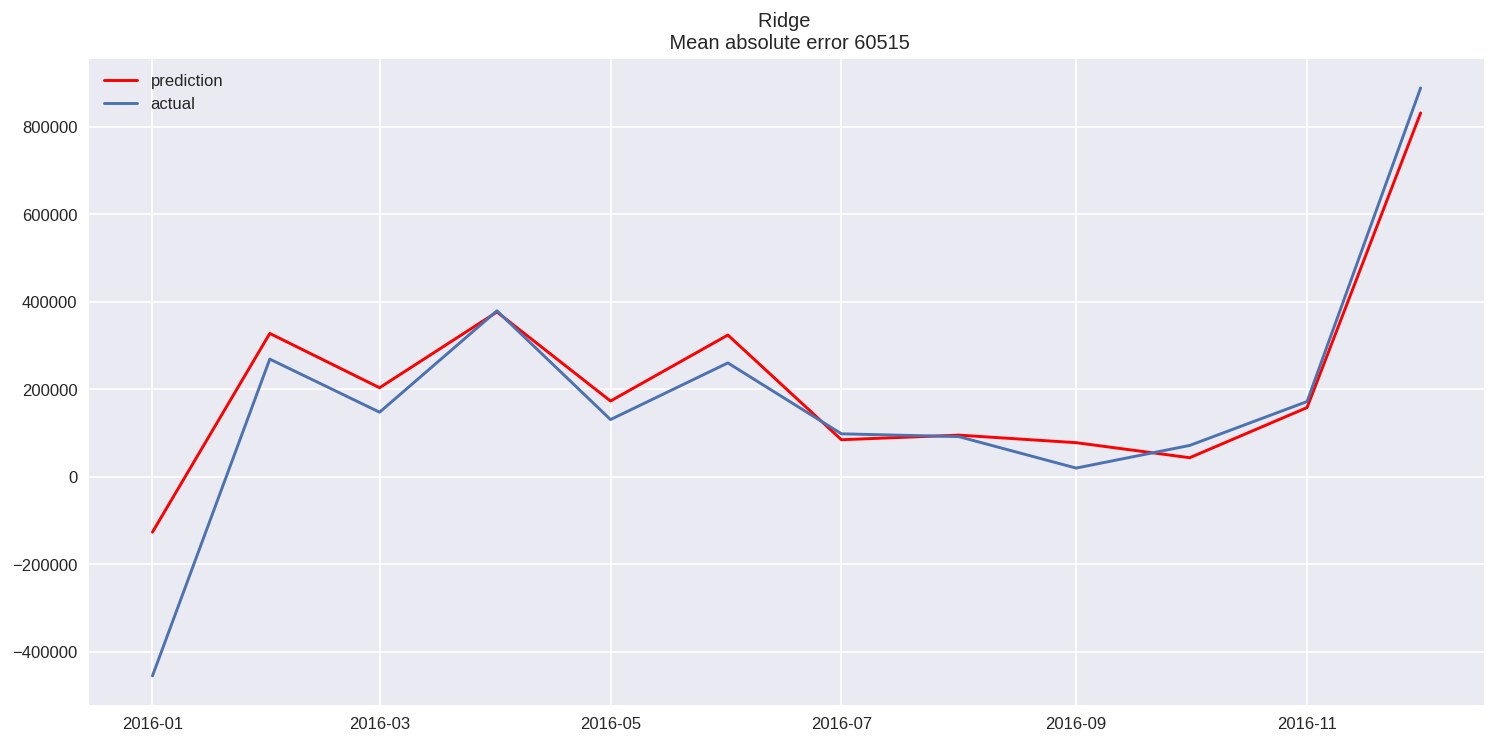

In [45]:
# модель Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

prediction_ridge = pd.Series(ridge.predict(X_valid), index = X_valid.index)

plt.figure(figsize=(15, 7))
plt.plot(prediction_ridge, "r", label="prediction")
plt.plot(y_valid, label="actual")
plt.legend(loc="best")
plt.title("Ridge \n Mean absolute error {}".format(round(mean_absolute_error(prediction_ridge, y_valid))));

In [46]:
print("Результаты работы модели Ridge")
print(f"MAE: {mean_absolute_error(prediction_ridge, df.iloc[60:72,0]).round()}")
print(f"RMSE:{np.sqrt(mean_squared_error(prediction_ridge, df.iloc[60:72, 0])).round()}")
print(f"MAPE:{mean_absolute_percentage_error(prediction_ridge, df.iloc[60:72,0]).round(4)}")

Результаты работы модели Ridge
MAE: 60515.0
RMSE:103372.0
MAPE:0.4364


In [47]:
#Какие параметры важные для Ridge
pd.DataFrame(ridge.coef_, index = X_train.columns).sort_values(by = 0)

,0
month_1,-67671.011451
month_9,-61374.135020
day_in_month,-60694.368102
Ключевая ставка,-54415.935782
Доходность ОФЗ по сроку до 1 года,-44659.291789
month_5,-39555.639802
month_11,-37885.547987
month_10,-24767.541201
month_3,-21453.600255
"М2, млрд руб",-88.059924


In [48]:
# Предсказание модели Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

prediction_ridge = pd.Series(ridge.predict(X_test), index = X_test.index)

По метрике MAE лучше модель машинного обучения Ridge, но хуже по двум другим. А вот модель SARIMA в совокупности показывает наилучший результат.

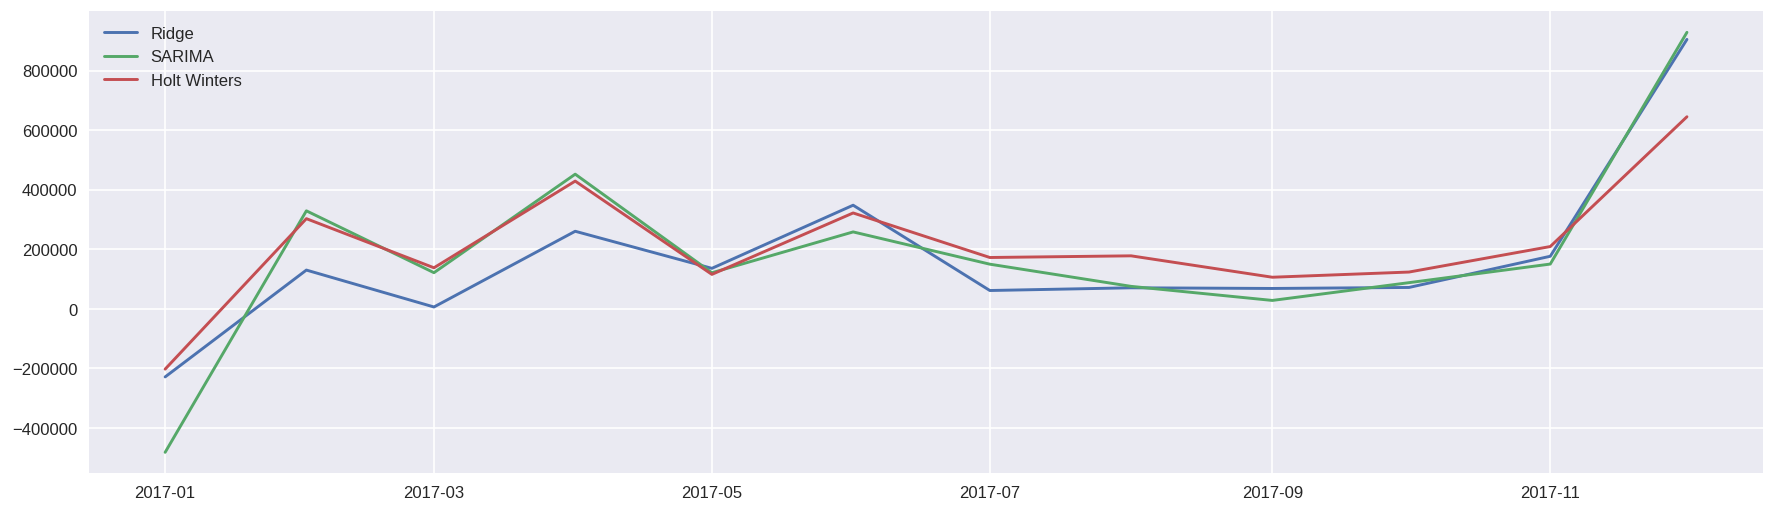

In [49]:
plt.plot(prediction_ridge, label =  'Ridge')
plt.plot(pred_sarima, label = 'SARIMA')
plt.plot(prediction_holt_wint, label = 'Holt Winters')
plt.legend();

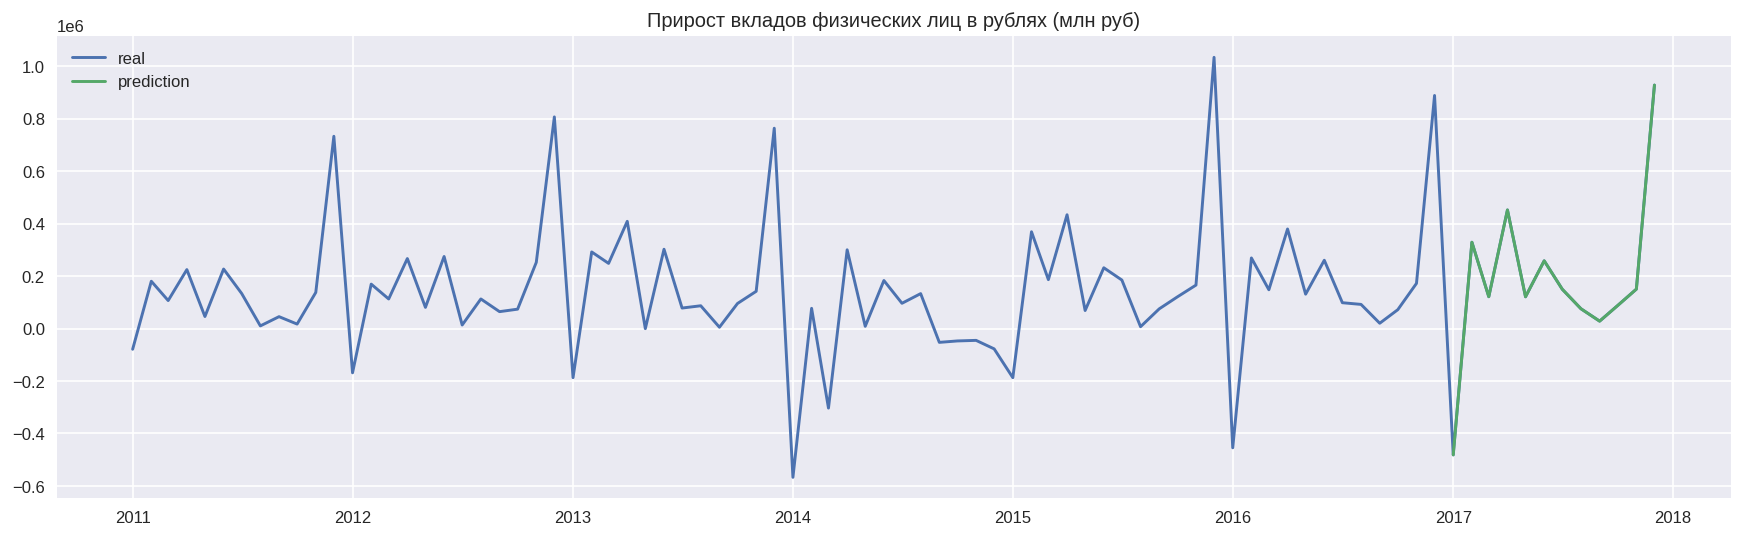

In [50]:
df.iloc[72:, 0] = pred_sarima
plt.plot(df.iloc[:, 0], label = 'real')
plt.plot(pred_sarima, label = 'prediction')
plt.legend()
plt.title(df.columns[0]);